# Computer vision - Week_01 - Image processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.color import rgb2gray
from skimage import io, data, transform

plt.rcParams['font.size'] = 18

## Preparation of synthetic data
The np.linspace function is a part of the NumPy library in Python and is used to create an array of evenly spaced numbers over a specified range. The name "linspace" stands for "linear space," and it's commonly used for generating sequences of numbers that are evenly distributed.

`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`

- start: The starting value of the sequence.
- stop: The end value of the sequence.
- num: The number of evenly spaced values to generate between start and stop. The default is 50 if not specified.


In [3]:
# Domain of a function
x = np.linspace(0, 2*np.pi, 500)

In [4]:
print(x.shape)
print(x[499])

(500,)
6.283185307179586


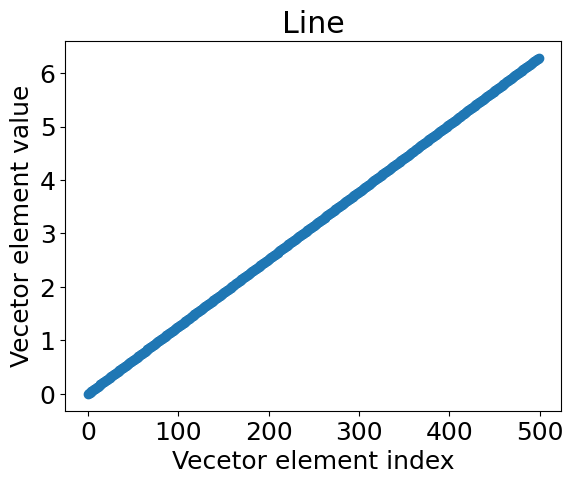

In [5]:
plt.title('Line')
plt.xlabel('Vecetor element index')
plt.ylabel('Vecetor element value')
plt.plot(x, "-o")

In [6]:
# Range of a function
y = np.sin(x)

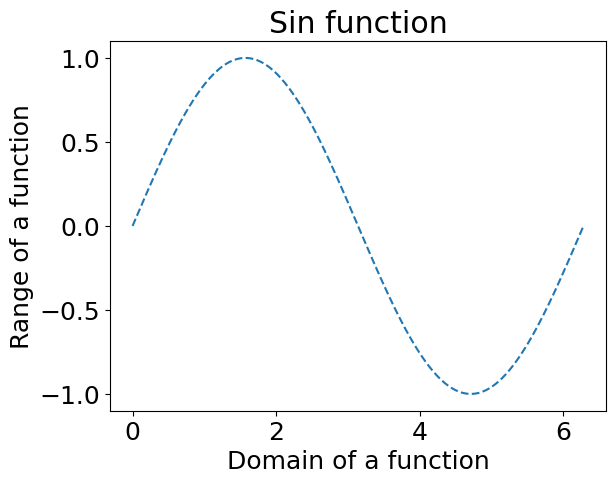

In [7]:
plt.figure()
plt.title('Sin function')
plt.xlabel('Domain of a function')
plt.ylabel('Range of a function')
plt.plot(x, y,'--')

## Generate random numbers
Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)

### 1D

In [8]:
np.random.rand(10)

array([0.42942554, 0.84551382, 0.01410485, 0.08774898, 0.5690678 ,
       0.07205843, 0.17610346, 0.50159563, 0.5442704 , 0.47480575])

### 2D (Random noise)

In [9]:
random_numbers_matrix = np.random.rand(128,256)
random_numbers_matrix.shape

(128, 256)

In [10]:
type(random_numbers_matrix)

numpy.ndarray

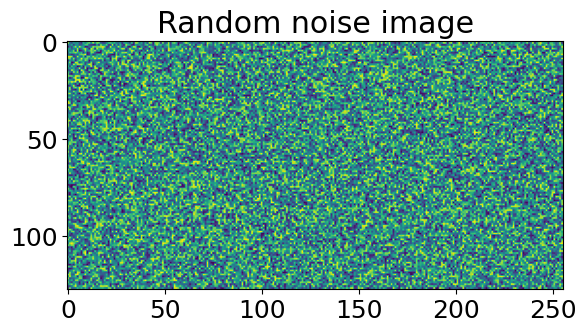

In [11]:
# Its possible to print ndarray (2D) as image.
plt.figure()
plt.title('Random noise image')
plt.imshow(random_numbers_matrix)

## Load image
### Load image from lib

We commonly load an image from the computer's hard drive. However, there is an option to load the image from an existing library, which we can utilize for initial experiments

In [12]:
from skimage import data
image_01 = data.astronaut()

In [13]:
print(image_01.shape)
print(type(image_01))

(512, 512, 3)
<class 'numpy.ndarray'>


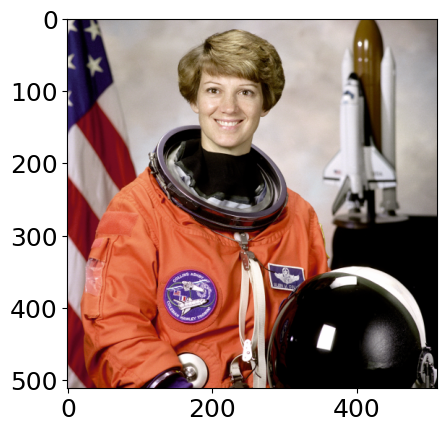

In [14]:
plt.imshow(image_01)

### Load image from local storage

In [15]:
# Its possible to use predefined images from library skimage.
from skimage import io
# image_02 = io.imread("_data/muffin.png")
image_02 = io.imread("https://picsum.photos/536/354")

In [16]:
print(image_02.shape)
print(type(image_02))

(354, 536, 3)
<class 'numpy.ndarray'>


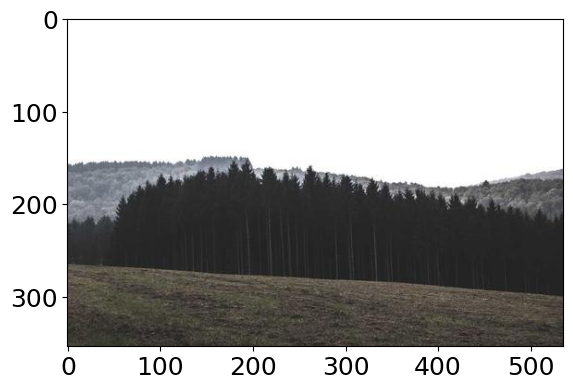

In [17]:
plt.imshow(image_02)

### Load image from url

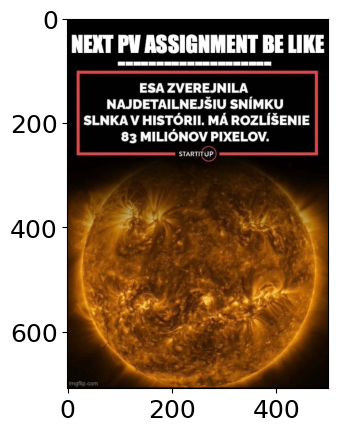

In [18]:
# Load the image from the URL
image_url = "https://i.redd.it/uncpw2ycdcq81.jpg"
image_03 = io.imread(image_url)
plt.imshow(image_03)

When loading data from disk or the internet in production, it's crucial to handle errors during the data loading process effectively.

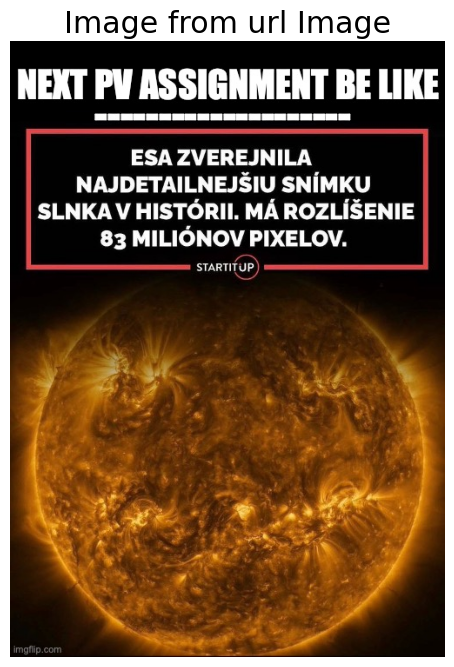

In [19]:
image_url = "https://i.redd.it/uncpw2ycdcq81.jpg"
try:
    # Load the image from the URL
    image_03 = io.imread(image_url)

    # Check if the image was loaded successfully
    if image_03 is not None:
        # Display the original image
        plt.figure(figsize=(8, 8))
        plt.imshow(image_03)
        plt.title("Image from url Image")
        plt.axis("off")
        plt.show()

    else:
        print("Failed to load the image from the URL.")

except Exception as e:
    print("An error occurred:", str(e))

## RGB to GrayScale image

In [20]:
print(image_01.shape)
image_01_gray = (rgb2gray(image_01) * 255).astype(dtype=np.uint8)
print(image_01_gray.shape)

(512, 512, 3)
(512, 512)


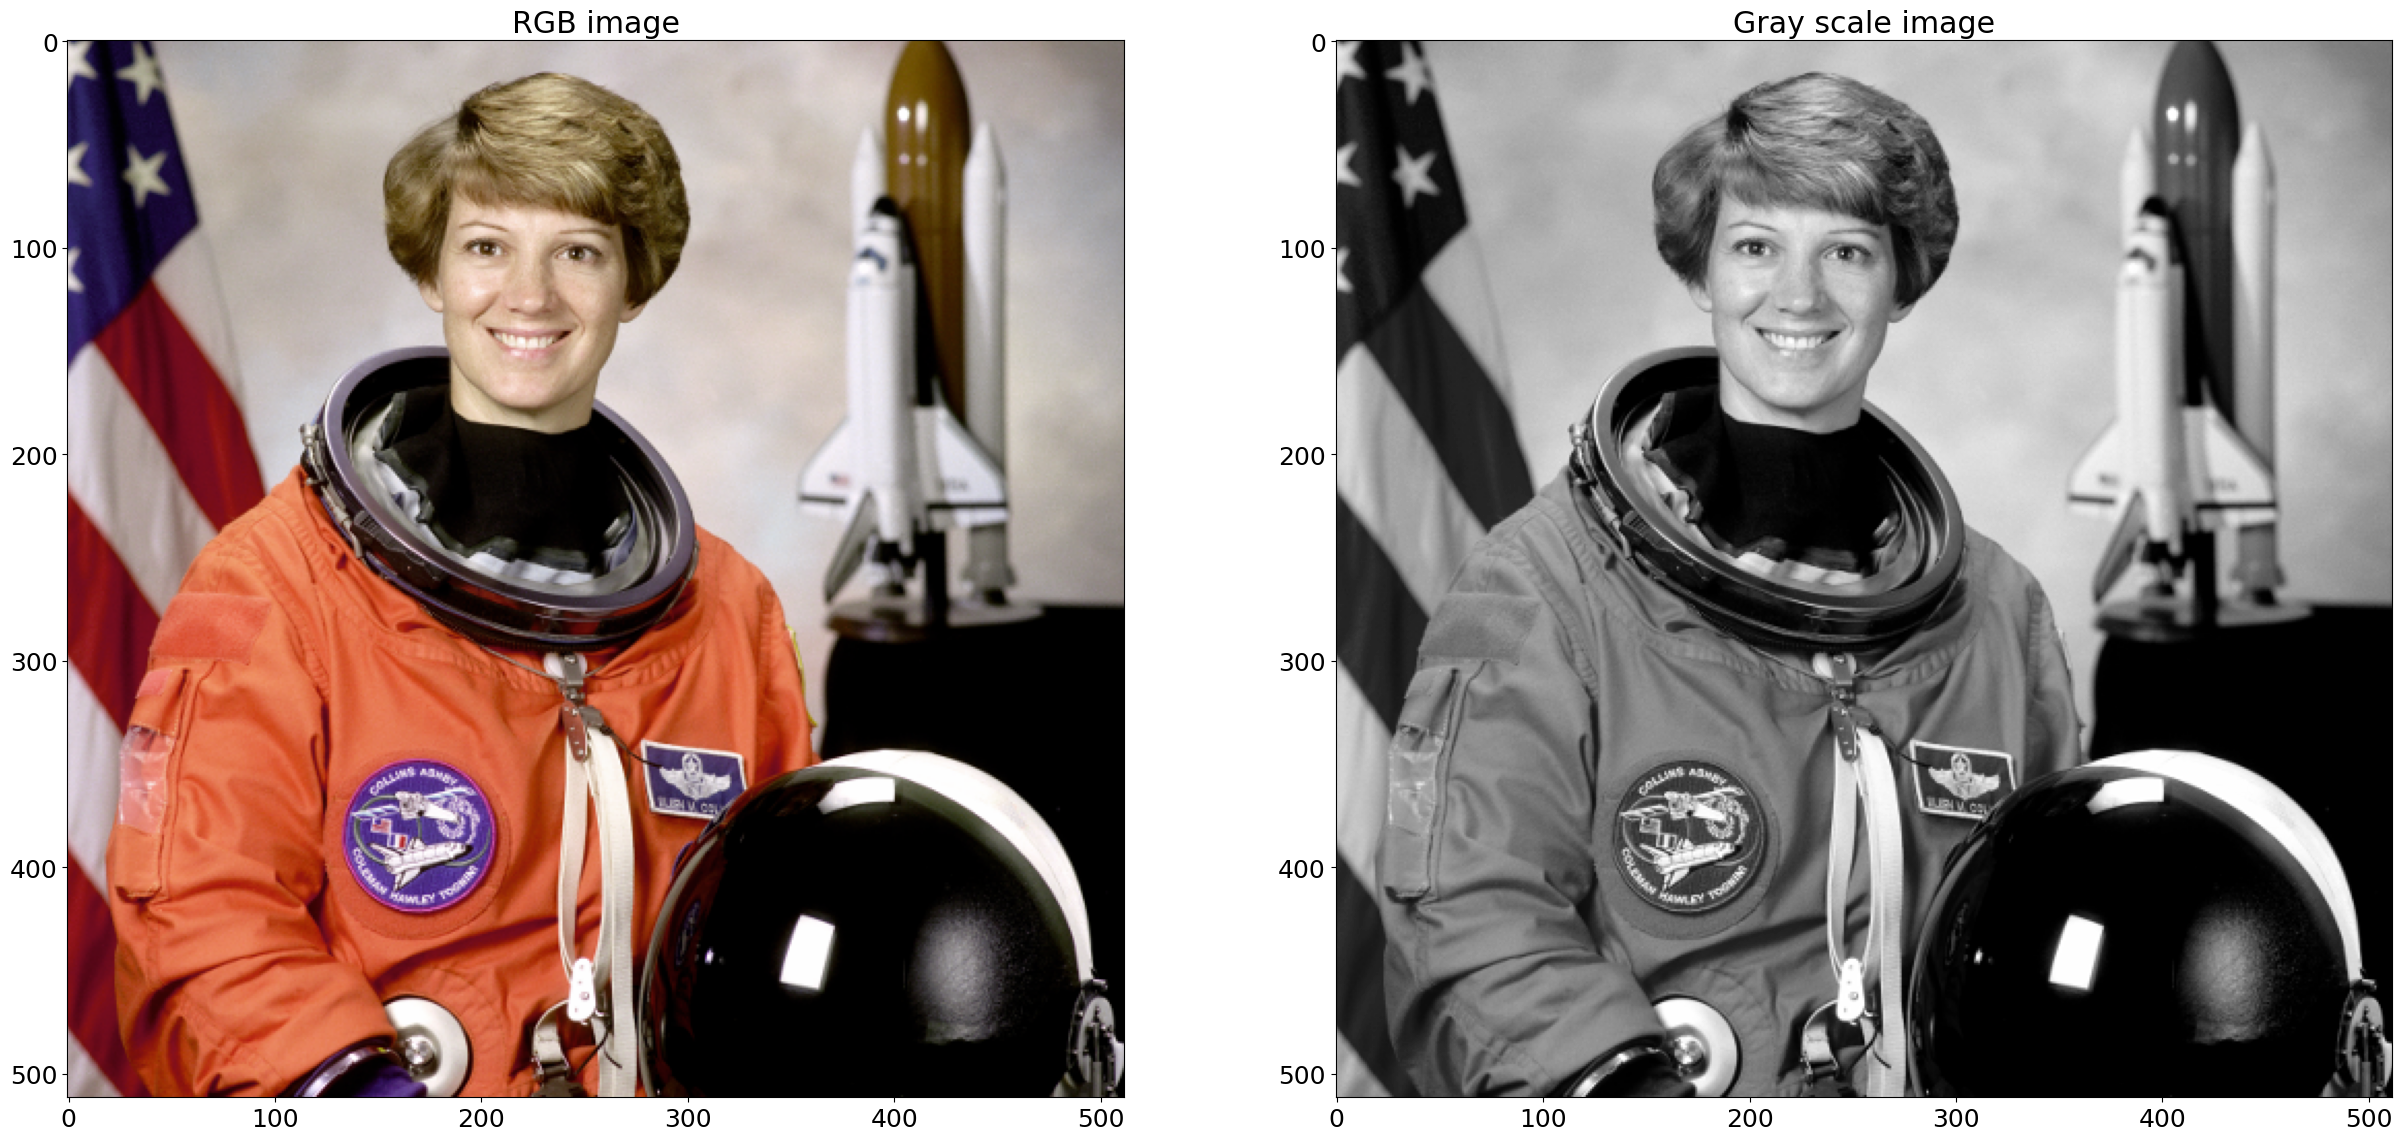

In [21]:
plt.figure(figsize= (30, 30))

plt.subplot(121)
plt.title('RGB image')
plt.imshow(image_01)

plt.subplot(122)
plt.title('Gray scale image')
# plt.imshow(image_01_gray)
plt.imshow(image_01_gray, cmap='gray')

In an RGB image, it is divided into three channels, each representing intensity for a different color. Brighter intensities indicate a greater contribution of that color to a given pixel. Darker pixel intensities signify a lesser contribution of that color.

In this image, alignment is demonstrated by combining three separate images into one larger one using the np.concatenate function.

<Figure size 640x480 with 0 Axes>

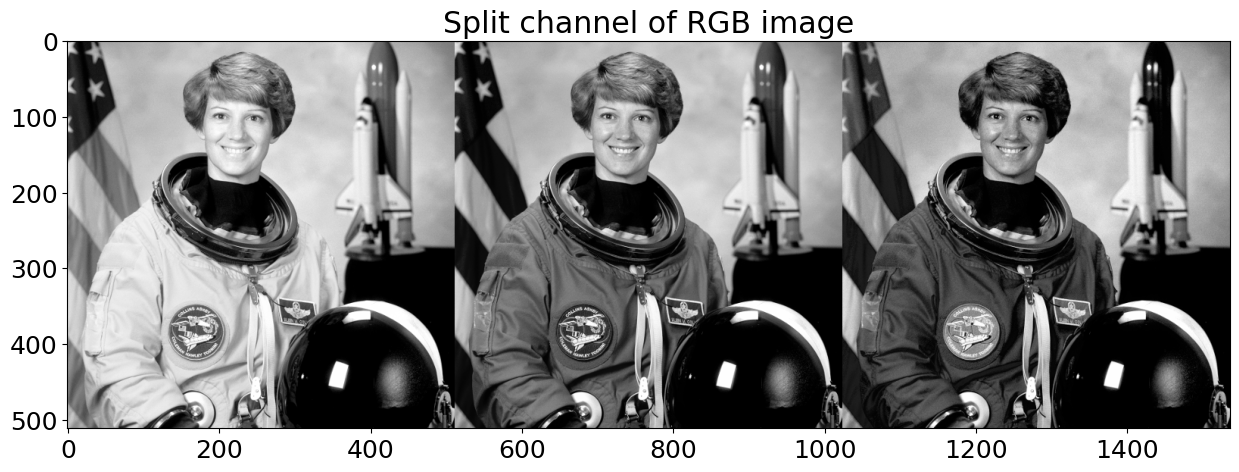

In [22]:
plt.figure()
plt.figure(figsize= (15, 60))
plt.title('Split channel of RGB image')
plt.imshow(np.concatenate((image_01[:, :, 0], image_01[:, :, 1], image_01[:, :, 2]), 1),cmap="gray")

### Manual RGB to GrayScale converiosn

Converting an RGB image to grayscale is not difficult. One possible approach is described below. Note that the individual color channels do not contribute equally to the result because the eye is not equally sensitive to each color component. Simply averaging the channels would result in a bland image. You may also notice that the result is not identical to the result of the function rgb2gray. rgb2gray uses a slightly different set of constants (0.2989R + 0.5870G + 0.1140*B).

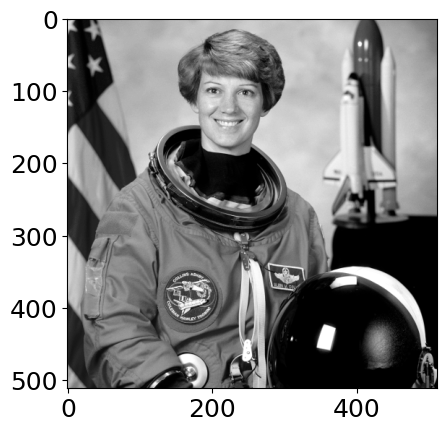

In [23]:
image_01_gray_manual = 0.2126 * image_01[:,:,0] + 0.7152 * image_01[:,:,1] + 0.0722 * image_01[:,:,2]
image_01_gray_manual = image_01_gray_manual.astype(dtype= np.uint8)
plt.figure()
plt.imshow(image_01_gray_manual, cmap= 'gray')

### Image comparsion

Error count: 1016
Mean square error:  0.003875732421875


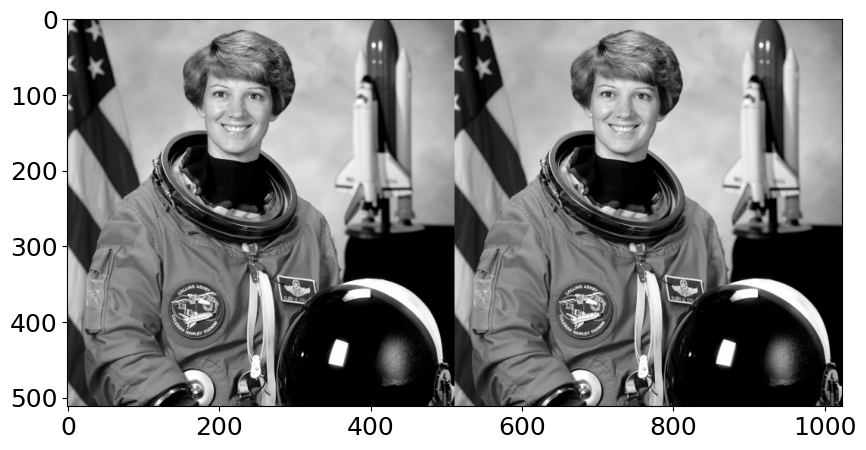

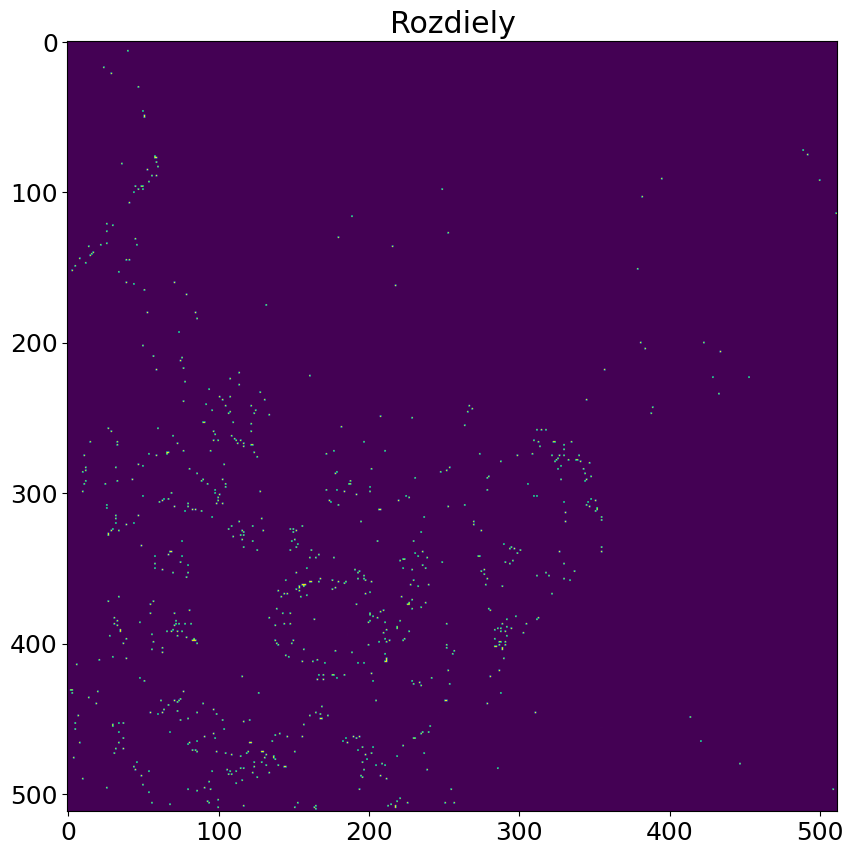

In [24]:
print("Error count:", np.sum((image_01_gray - image_01_gray_manual) ** 2))
print("Mean square error: ", np.sum((image_01_gray - image_01_gray_manual)**2 / image_01_gray_manual.size))

plt.figure(figsize= (10, 10))
plt.imshow(np.concatenate((image_01_gray, image_01_gray_manual), 1), cmap= 'gray')

plt.figure(figsize= (10, 10))
plt.title('Rozdiely')
plt.imshow(image_01_gray - image_01_gray_manual)

## Image manipulation
Image transformations are one of the fundamental operations in image processing. Today, there are numerous libraries offering a wide range of transformations. These transformations are also commonly used, for instance, when augmenting datasets during the training of neural network models.

[Image transformations - scikit-image](https://scikit-image.org/docs/stable/api/skimage.transform.html)

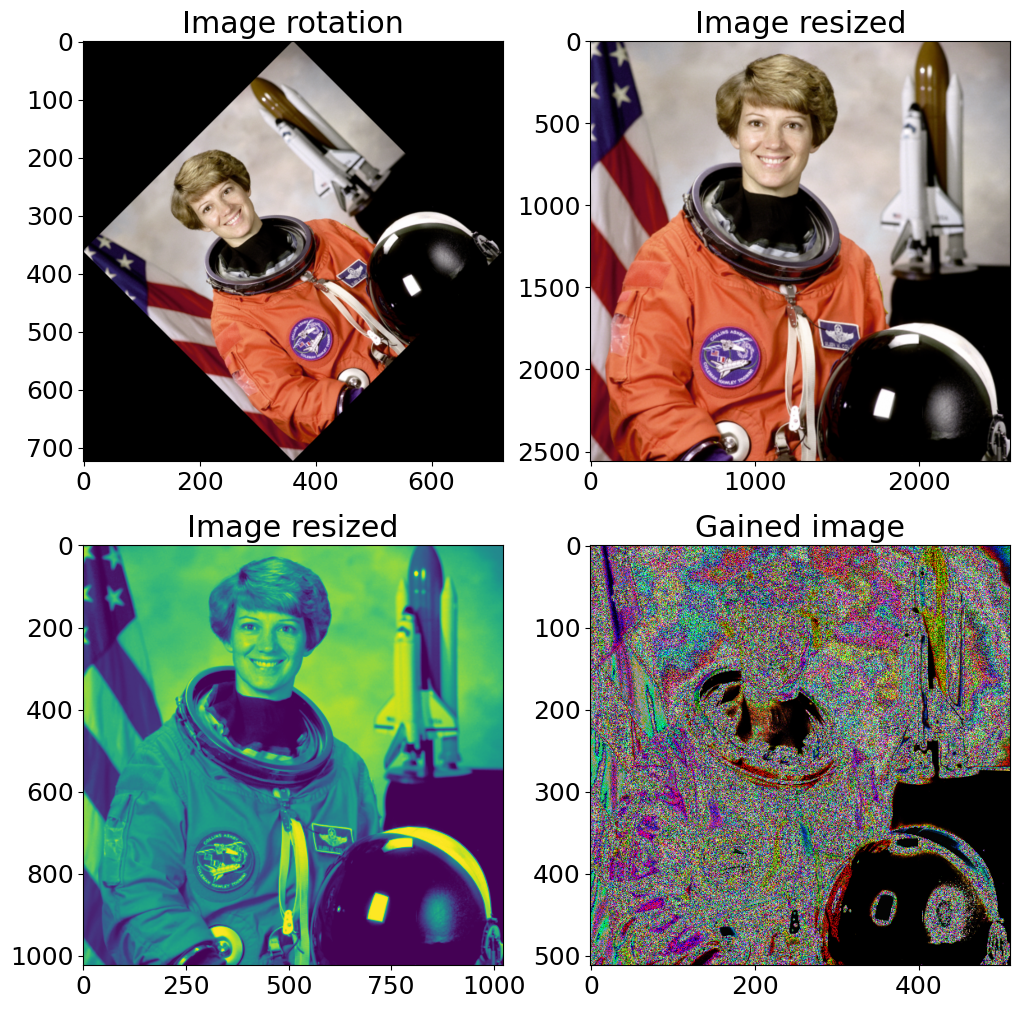

In [25]:
iRotated = transform.rotate(image_01, 45, resize=True)
iResized = transform.resize(image_01, (np.array(image_01.shape)[0] * 5, np.array(image_01.shape)[1] *5), order= 1)
iResized2 = transform.rescale(image_01_gray, 2)


plt.figure(figsize= (12, 12))

plt.subplot(221)
plt.title('Image rotation')
plt.imshow(iRotated)

plt.subplot(222)
plt.title('Image resized')
plt.imshow(iResized)

plt.subplot(223)
plt.title('Image resized')
plt.imshow(iResized2)

plt.subplot(224)
plt.title('Gained image')
plt.imshow(image_01**2)

# HomeWork

Napíšte vlastný program, ktorý načíta obrázok, rozdelí ho pomyselnou mriežkou vami definovaných rozmerov a jednotlivé výrezy obrázku náhodne poprehadzuje. Zobrazte výsledok.

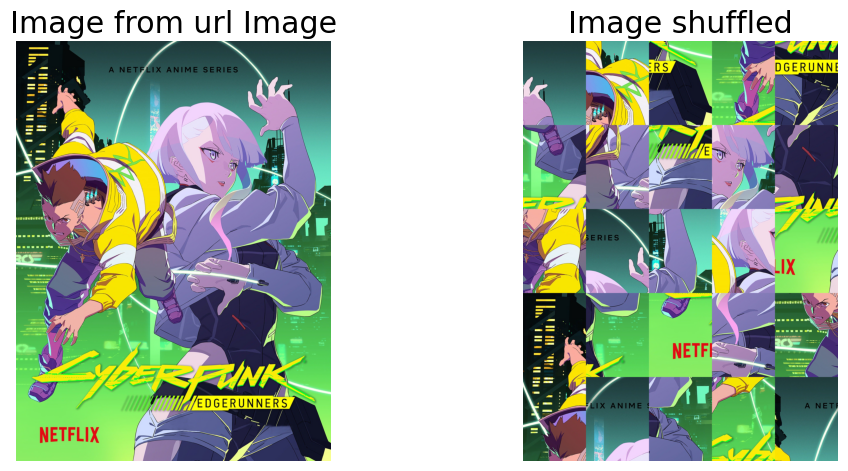

In [44]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import requests

# Define the URL of the image you want to process
url = "https://flxt.tmsimg.com/assets/p22812509_b_v13_ab.jpg"

# Define the grid size (number of rows and columns)
grid_size = 5

# Number of shuffles (random rearrangements)
number_of_shuffles = 10

# Function to split the image into a grid
def split_image(image, rows, cols):
    width, height = image.size
    piece_width = width // cols
    piece_height = height // rows
    pieces = []
    
    for i in range(rows):
        for j in range(cols):
            left = j * piece_width
            upper = i * piece_height
            right = left + piece_width
            lower = upper + piece_height
            slice_img = image.crop((left, upper, right, lower))
            pieces.append(slice_img)
    
    # print(pieces)

    return pieces

# Function to shuffle the pieces randomly
def shuffle_pieces(pieces):
    random.shuffle(pieces)

# Function to create a new image from shuffled pieces
def create_shuffled_image(pieces, rows, cols):
    piece_width, piece_height = pieces[0].size
    width = piece_width * cols
    height = piece_height * rows
    shuffled_image = Image.new('RGB', (width, height))
    
    for i, slice_img in enumerate(pieces):
        # print(i,cols,rows)
        col_idx = i % cols
        row_idx = i // rows
        # print(f"col_indx: {col_idx}, row_idx: {row_idx}")
        left = col_idx * piece_width
        upper = row_idx * piece_height
        shuffled_image.paste(slice_img, (left, upper))
    
    return shuffled_image

# Load the image from the URL
response = requests.get(url)

with open("image.jpg", "wb") as f:
    f.write(response.content)

image = Image.open("image.jpg")

# Split the image into a grid
pieces = split_image(image, grid_size, grid_size)

# Shuffle the pieces multiple times
for _ in range(number_of_shuffles):
    shuffle_pieces(pieces)

# Create the shuffled image
shuffled_image = create_shuffled_image(pieces, grid_size, grid_size)

# plot original and shuffled image
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Image from url Image')
plt.imshow(image)
plt.axis("off")
plt.subplot(222)
plt.title('Image shuffled')
plt.imshow(shuffled_image)
plt.axis("off")
plt.show()